# Change Point Index Creator and Day Splitter

## Dataset Creator

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../meal_identification"))

from DatasetGenerator import *

### Dataset Creator Demo

In [3]:
result_df = dataset_creator(return_data=True)
walker_df = result_df[0]
christopher_df = result_df[1]

/Users/andrewyang/Projects/bg_control
/Users/andrewyang/Projects/bg_control/0_meal_identification/meal_identification/data/raw
Loaded DataFrames: ['500030_2024-07-01_2024-09-30.csv', '679372_2024-07-01_2024-09-30.csv']

Processing: 500030
Erasing meal overlap with minCarb10g and 3hr meal window
Project root: /Users/andrewyang/Projects/bg_control
Data saved successfully in: 0_meal_identification/meal_identification/data/interim

 	 Dataset label: 2024-10-30_500030___timeInter5mins_dayStart4hrs_minCarb10g_3hrMealW

Processing: 679372
Erasing meal overlap with minCarb10g and 3hr meal window
Project root: /Users/andrewyang/Projects/bg_control
Data saved successfully in: 0_meal_identification/meal_identification/data/interim

 	 Dataset label: 2024-10-30_679372___timeInter5mins_dayStart4hrs_minCarb10g_3hrMealW


 All data saved successfully in: 0_meal_identification/meal_identification/data/interim


### Explanation

Below we see Walker and Christopher's data for their first 21 meal annoucements in the dataset, notice that they should typically be larger meals and there should not be more than 3 meals per day.

In [313]:
walker_df[walker_df['msg_type'] == 'ANNOUNCE_MEAL'][0:21]

,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,food_g_keep,day_start_shift
date,,,,,,,,,
2024-07-01 13:55:00-05:00,103.0,ANNOUNCE_MEAL,None,None,NaN,45.0,NaN,45.0,2024-07-01
2024-07-01 20:35:00-05:00,97.0,ANNOUNCE_MEAL,None,None,NaN,43.0,NaN,15.0,2024-07-01
2024-07-02 02:45:00-05:00,48.0,ANNOUNCE_MEAL,None,None,NaN,20.0,NaN,20.0,2024-07-01
2024-07-02 10:05:00-05:00,112.0,ANNOUNCE_MEAL,None,None,NaN,42.0,NaN,35.0,2024-07-02
2024-07-02 13:25:00-05:00,112.0,ANNOUNCE_MEAL,None,None,NaN,37.0,NaN,12.0,2024-07-02
2024-07-02 20:15:00-05:00,197.0,ANNOUNCE_MEAL,None,None,NaN,107.0,NaN,75.0,2024-07-02
2024-07-03 10:15:00-05:00,112.0,ANNOUNCE_MEAL,None,None,NaN,86.0,NaN,35.0,2024-07-03
2024-07-03 18:05:00-05:00,85.0,ANNOUNCE_MEAL,None,None,NaN,50.0,NaN,50.0,2024-07-03
2024-07-03 22:50:00-05:00,132.0,ANNOUNCE_MEAL,None,None,NaN,12.0,NaN,12.0,2024-07-03


In [314]:
christopher_df[christopher_df['msg_type'] == 'ANNOUNCE_MEAL'][0:21]

,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,food_g_keep,day_start_shift
date,,,,,,,,,
2024-07-01 14:30:00-04:00,157.0,ANNOUNCE_MEAL,None,None,NaN,49.50,NaN,22.0,2024-07-01
2024-07-02 13:15:00-04:00,102.0,ANNOUNCE_MEAL,None,None,NaN,40.00,NaN,40.0,2024-07-02
2024-07-02 21:55:00-04:00,168.0,ANNOUNCE_MEAL,None,None,NaN,8.00,NaN,8.0,2024-07-02
2024-07-03 09:50:00-04:00,130.0,ANNOUNCE_MEAL,None,None,NaN,6.00,NaN,6.0,2024-07-03
2024-07-03 14:10:00-04:00,95.0,ANNOUNCE_MEAL,None,None,NaN,40.00,NaN,40.0,2024-07-03
2024-07-03 19:05:00-04:00,110.0,ANNOUNCE_MEAL,None,None,NaN,85.00,NaN,45.0,2024-07-03
2024-07-04 17:25:00-04:00,131.0,ANNOUNCE_MEAL,None,None,NaN,90.00,NaN,45.0,2024-07-04
2024-07-05 09:30:00-04:00,164.0,ANNOUNCE_MEAL,None,None,NaN,8.00,NaN,8.0,2024-07-05
2024-07-05 09:45:00-04:00,153.0,ANNOUNCE_MEAL,None,None,NaN,8.00,NaN,8.0,2024-07-05


### Meal Annoucement Histograms

### Meal Distribution Times

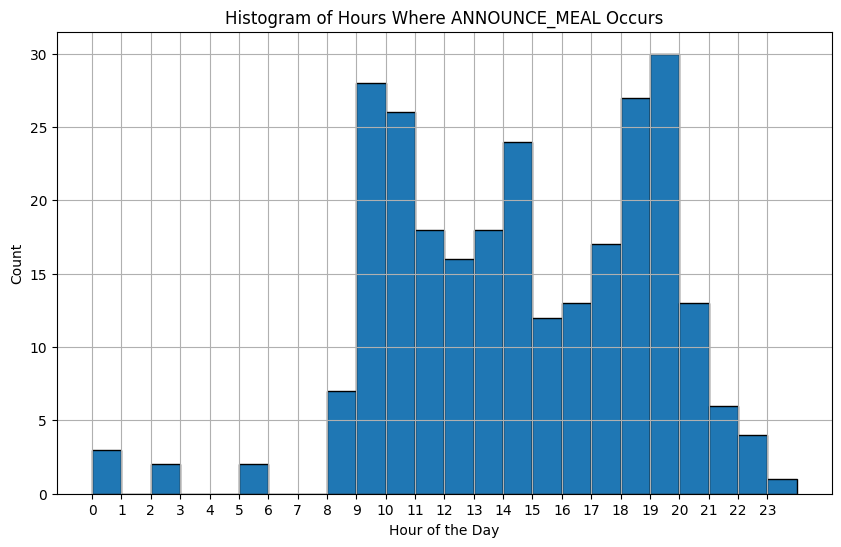

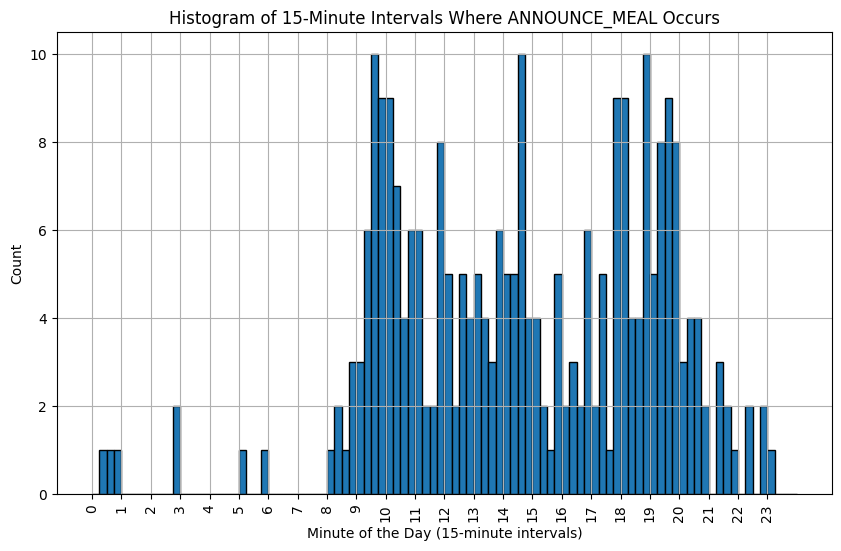

In [4]:
plot_announce_meal_histogram(walker_df, hours_or_15minutes='hours')
plot_announce_meal_histogram(walker_df, hours_or_15minutes='minutes')

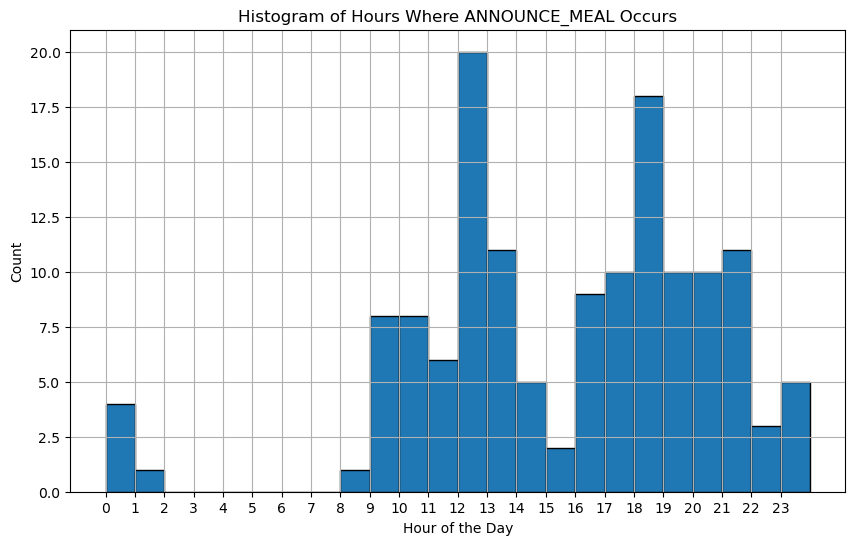

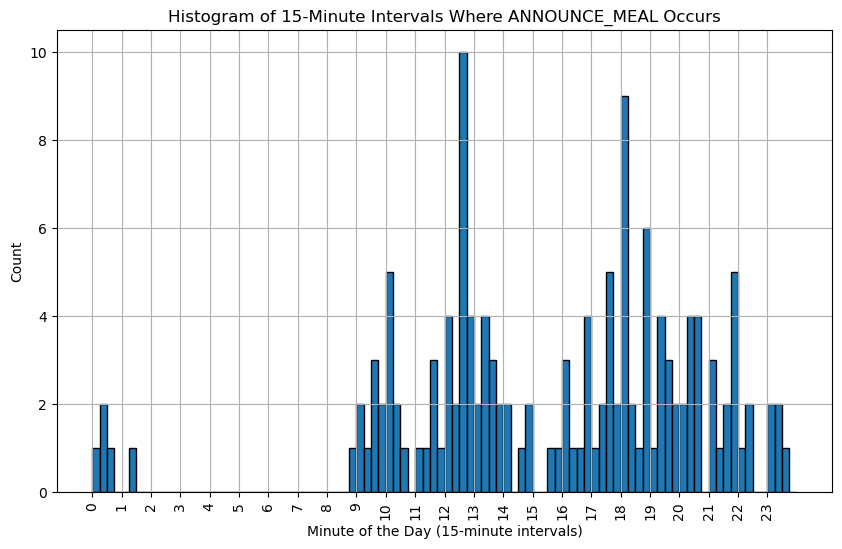

In [317]:
plot_announce_meal_histogram(christopher_df, hours_or_15minutes='hours')
plot_announce_meal_histogram(christopher_df, hours_or_15minutes='minutes')

## Dataset Creation Loop - Hyperparameters



In [318]:
from sklearn.model_selection import ParameterGrid

# Define the hyperparameter grid
param_grid = {
    'meal_length_window': [2, 3, 5],
    'n_top_carb_meals': [3, 4],
    'min_carbs': [5, 10]
}

# Create the grid of hyperparameter settings
grid = ParameterGrid(param_grid)

# Print the grid
for params in grid:
    print(params)

{'meal_length_window': 2, 'min_carbs': 5, 'n_top_carb_meals': 3}
{'meal_length_window': 2, 'min_carbs': 5, 'n_top_carb_meals': 4}
{'meal_length_window': 2, 'min_carbs': 10, 'n_top_carb_meals': 3}
{'meal_length_window': 2, 'min_carbs': 10, 'n_top_carb_meals': 4}
{'meal_length_window': 3, 'min_carbs': 5, 'n_top_carb_meals': 3}
{'meal_length_window': 3, 'min_carbs': 5, 'n_top_carb_meals': 4}
{'meal_length_window': 3, 'min_carbs': 10, 'n_top_carb_meals': 3}
{'meal_length_window': 3, 'min_carbs': 10, 'n_top_carb_meals': 4}
{'meal_length_window': 5, 'min_carbs': 5, 'n_top_carb_meals': 3}
{'meal_length_window': 5, 'min_carbs': 5, 'n_top_carb_meals': 4}
{'meal_length_window': 5, 'min_carbs': 10, 'n_top_carb_meals': 3}
{'meal_length_window': 5, 'min_carbs': 10, 'n_top_carb_meals': 4}


In [319]:
for ds_config in grid:
    print(ds_config)
    dataset_creator(meal_length=pd.Timedelta(hours=ds_config['meal_length_window']),
                    n_top_carb_meals=ds_config['n_top_carb_meals'],
                    min_carbs=ds_config['min_carbs'],
                    return_data=False)

{'meal_length_window': 2, 'min_carbs': 5, 'n_top_carb_meals': 3}
/home/cjrisi/Projects/bg_control
/home/cjrisi/Projects/bg_control/0_meal_identification/meal_identification/data/raw
Loaded DataFrames: ['500030_2024-07-01_2024-09-30.csv', '679372_2024-07-01_2024-09-30.csv']

Processing: 500030
Erasing meal overlap with minCarb5g and 2hr meal window
Project root: /home/cjrisi/Projects/bg_control
Data saved successfully in: 0_meal_identification/meal_identification/data/interim

 	 Dataset label: 2024-10-24_500030___timeInter5mins_dayStart4hrs_minCarb5g_2hrMealW

Processing: 679372
Erasing meal overlap with minCarb5g and 2hr meal window
Project root: /home/cjrisi/Projects/bg_control
Data saved successfully in: 0_meal_identification/meal_identification/data/interim

 	 Dataset label: 2024-10-24_679372___timeInter5mins_dayStart4hrs_minCarb5g_2hrMealW


 All data saved successfully in: 0_meal_identification/meal_identification/data/interim
{'meal_length_window': 2, 'min_carbs': 5, 'n_top_car